# 感知机

参考：[《统计学习方法》读书笔记——感知机](https://www.cnblogs.com/OldPanda/archive/2013/04/12/3017100.html)

思想：错误驱动

模型：$f(x)=sign(w^Tx+b)$

目标函数：$min-\sum_{x\in M}y^{(i)}(w^Tx^{(i)}+b)$

优化：$w^*:=w+\eta y^{(i)}x^{(i)} \\
b^*:=b+\eta y^{(i)}$

对偶形式：假设对于误分类点$(x^{(i)}, y^{(i)})$更新参数的次数为n_i次，则$w$关于$(x^{(i)}, y^{(i)})$的增量为$n_i\eta y^{(i)}x^{(i)}$。

令$n_i\eta =\alpha_i$

则$w=\sum_{i=1}^m\alpha_iy^{(i)}x^{(i)}$

模型：$sign(\sum_{j=1}^m\alpha_jy^{(j)}x^{(j)}x^{(i)}+b)$

算法：$1.初始化\alpha\leftarrow 0, b\leftarrow 0\\
2.选取样本点(x^{(i)}, y^{(i)})，如果y^{(i)}(\sum_{j=1}^m\alpha_j y^{(j)}x^{(j)}x^{(i)}+b)<=0\\
3.更新\alpha:= \alpha+\eta, b:= b+\eta y^{(i)}\\
4.返回第2步，直至所有样本点分类正确。$

## 自定义类

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wh_data = pd.read_csv('武汉.csv', index_col='date', encoding='utf-8', engine='python')
wh_data.drop(wh_data[wh_data['质量等级']=='无'].index, inplace=True)
wh_data.head()

,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3_8h
date,,,,,,,,
2014-01-01,203,重度污染,153,210,70,2.0,106,55
2014-01-02,231,重度污染,181,254,89,2.4,112,26
2014-01-03,224,重度污染,174,226,63,1.7,84,55
2014-01-04,147,轻度污染,112,184,73,1.6,87,40
2014-01-05,195,中度污染,147,213,89,2.2,91,53


In [0]:
def get_grade(aqi):
    if aqi == 29:
        return 1
    elif aqi == 51:
        return -1

In [4]:
wh_data['GRADE'] = wh_data.AQI.apply(get_grade)
wh_data.dropna(inplace=True)
wh_data.groupby('GRADE').count().AQI

GRADE
-1.0    7
 1.0    5
Name: AQI, dtype: int64

In [0]:
X = wh_data.iloc[:, 2:4]
y = wh_data.iloc[:, -1]

In [0]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
standardscaler.fit(X)
X_sca = standardscaler.transform(X)

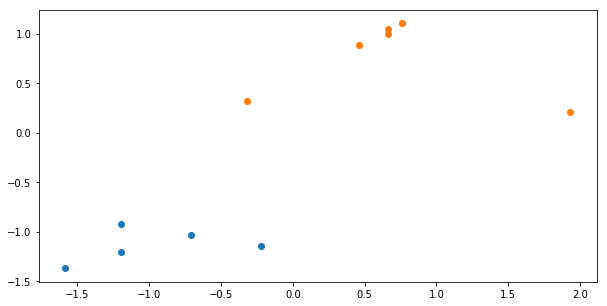

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(X_sca[y==1,0], X_sca[y==1,1])
plt.scatter(X_sca[y==-1,0], X_sca[y==-1,1]) 
plt.show()

In [0]:
class myPLA():
    def __init__(self, eta=1.0, max_iter=1000):
        self._X = None
        self._y = None
        self._w = None
        self._b = None
        self._eta = eta
        self._iter = max_iter
        
    def _check(self):
        flag = False
        for x_i, y_i in zip(self._X, self._y):
            if y_i * self._w @ x_i + self._b <= 0:
                flag = True
                break
        return x_i, y_i, flag
    
    def fit(self, X, y):
        self._X = X
        self._y = y
        self._w = np.zeros(self._X.shape[1])
        self._b = 0
        for i in range(self._iter):
            x_i, y_i, flag = self._check()
            if not flag:
                return self
            else:
                self._w = self._w + self._eta * y_i * x_i
                self._b = self._b + self._eta * y_i
                return self
        
    def predict(self, X_new):
        threshold = X_new @ self._w + self._b
        return np.array(threshold > 0, dtype=np.int64) - np.array(threshold <= 0, dtype=np.int64)
    
    def score(self, X, y):
        y_new = self.predict(X)
        return np.sum(y_new==y) / len(y)

In [9]:
my_PLA = myPLA()
my_PLA.fit(X_sca, y)
my_PLA.score(X_sca, y)

1.0

In [0]:
def plot_decision_boundary(model, axis):
    X0, X1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int(axis[1]-axis[0])*1000).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int(axis[3]-axis[2])*1000).reshape(-1, 1),
    )
    X = np.c_[X0.ravel(), X1.ravel()]
    Y = model.predict(X).reshape(X0.shape)
        
    plt.contourf(X0, X1, Y)

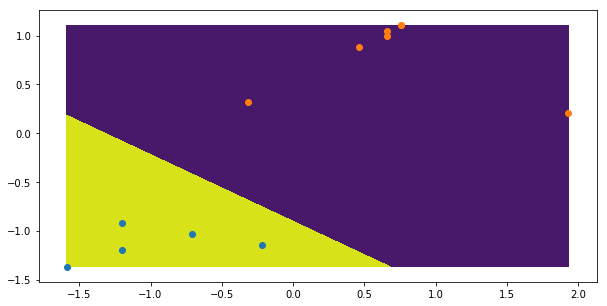

In [11]:
plt.figure(figsize=(10,5))
plot_decision_boundary(my_PLA, axis=[np.min(X_sca[:,0]),np.max(X_sca[:,0]), np.min(X_sca[:,1]),np.max(X_sca[:,1])])
plt.scatter(X_sca[y==1,0], X_sca[y==1,1])
plt.scatter(X_sca[y==-1,0], X_sca[y==-1,1]) 
plt.show()

## 使用sklearn

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def get_grade(aqi):
    if aqi <= 100:
        return 1
    else:
        return -1

In [14]:
wh_data = pd.read_csv('武汉.csv', index_col='date', encoding='utf-8', engine='python')
wh_data.drop(wh_data[wh_data['质量等级']=='无'].index, inplace=True)
wh_data['GRADE'] = wh_data.AQI.apply(get_grade)
wh_data.groupby('GRADE').count().AQI

GRADE
-1     689
 1    1125
Name: AQI, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = wh_data.iloc[:, 2:-1]
y = wh_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

standardscaler = StandardScaler()
standardscaler.fit(X_train)
X_train_sca = standardscaler.transform(X_train)
X_test_sca = standardscaler.transform(X_test)

In [16]:
from sklearn.linear_model import Perceptron

PLA = Perceptron(random_state=100)
PLA.fit(X_train_sca, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=100, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
PLA.score(X_test_sca, y_test)

0.8700440528634361